In [476]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

# Read the dataset

In [477]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [478]:
df.shape

(16719, 16)

In [479]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Notice that User_Score is not numeric 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CB3D81508>,
      dtype=object)

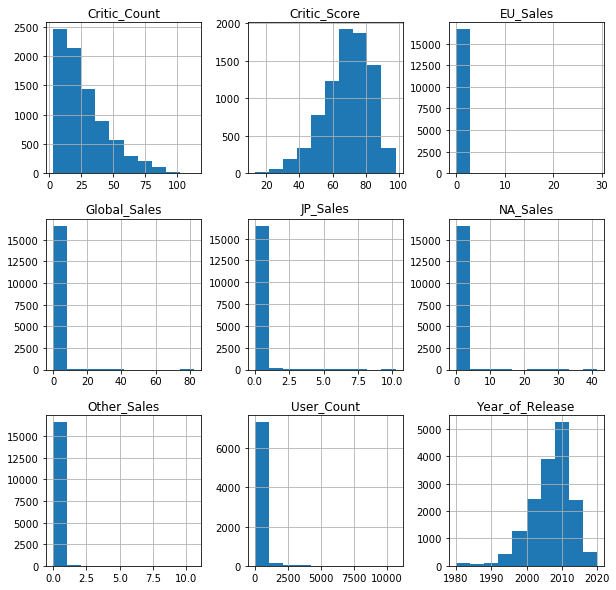

In [480]:
df.hist(figsize = (10, 10))

# Check for missing values 

Total missing values for each variable

In [481]:
nas = df.isna().sum()
total_nas = nas.sum()
print(nas)
print(total_nas)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
46716


Amount of values we should have

In [482]:
total_values = df.shape[0] * df.shape[1]
total_values

267504

Missing values percentage

In [483]:
total_nas / total_values

0.1746366409474251

## Information about NA variables

In [484]:
df.isna()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16715,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16716,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16717,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


Know how well a game sold but doesn't have a User_Score and User_Count

In [485]:
df[df['User_Score'].isna()].iloc[df['Global_Sales'].idxmax()]

Name               Super Mario Bros.
Platform                         NES
Year_of_Release                 1985
Genre                       Platform
Publisher                   Nintendo
NA_Sales                       29.08
EU_Sales                        3.58
JP_Sales                        6.81
Other_Sales                     0.77
Global_Sales                   40.24
Critic_Score                     NaN
Critic_Count                     NaN
User_Score                       NaN
User_Count                       NaN
Developer                        NaN
Rating                           NaN
Name: 1, dtype: object

Now let's check the sales of game with missing Critic_Score and Critic_Count

In [486]:
df[df['Critic_Score'].isna()].iloc[df['Global_Sales'].idxmax()]

Name               Super Mario Bros.
Platform                         NES
Year_of_Release                 1985
Genre                       Platform
Publisher                   Nintendo
NA_Sales                       29.08
EU_Sales                        3.58
JP_Sales                        6.81
Other_Sales                     0.77
Global_Sales                   40.24
Critic_Score                     NaN
Critic_Count                     NaN
User_Score                       NaN
User_Count                       NaN
Developer                        NaN
Rating                           NaN
Name: 1, dtype: object

### Decide what to do with the missing values. In this case, delete

In [487]:
df = df.dropna(subset=['Name', 'Year_of_Release', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'])
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [488]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [489]:
df.shape

(6825, 16)

Current total values

In [490]:
df.shape[1] * df.shape[0]

109200

We removed 40% of observations when removing all NA values. There was no easy way to impute the data so I took the decision to remove them as we still got a lot of observations we can work on 

### Convert User_Score to a value between 1-100 instead of 1-10

In [491]:
#df['User_Score'] = df['User_Score'].values
df['User_Score'] = df['User_Score'].values.astype(float)
df['User_Score'] = df['User_Score'] * 10
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E


### Lets try selecting lower sales values to check if in that case there is a linear relationship

In [492]:
testdf = df[df['Global_Sales'] < 1]
testdf

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2076,NFL Fever 2002,XB,2000.0,Sports,Microsoft Game Studios,0.74,0.21,0.00,0.04,0.99,79.0,24.0,85.0,10.0,Microsoft Game Studios,E
2077,Just Dance 2014,X360,2013.0,Misc,Ubisoft,0.72,0.17,0.00,0.10,0.99,79.0,16.0,78.0,33.0,Ubisoft,E10+
2078,NCAA Football 12,X360,2011.0,Sports,Electronic Arts,0.94,0.00,0.00,0.06,0.99,82.0,25.0,66.0,49.0,EA Sports,E
2080,UFC Undisputed 3,X360,2012.0,Action,THQ,0.72,0.20,0.00,0.08,0.99,85.0,60.0,76.0,88.0,Yuke's,T
2081,Kirby: Mass Attack,DS,2011.0,Platform,Nintendo,0.48,0.06,0.41,0.05,0.99,83.0,46.0,86.0,55.0,HAL Labs,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,24.0,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,88.0,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,76.0,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,58.0,43.0,Atomic Games,T


In [493]:
#testdf['Global_Sales'] = testdf['Global_Sales'] * 1000 #Now units are "thousands" instead of "millions"

## Check correlation of variables

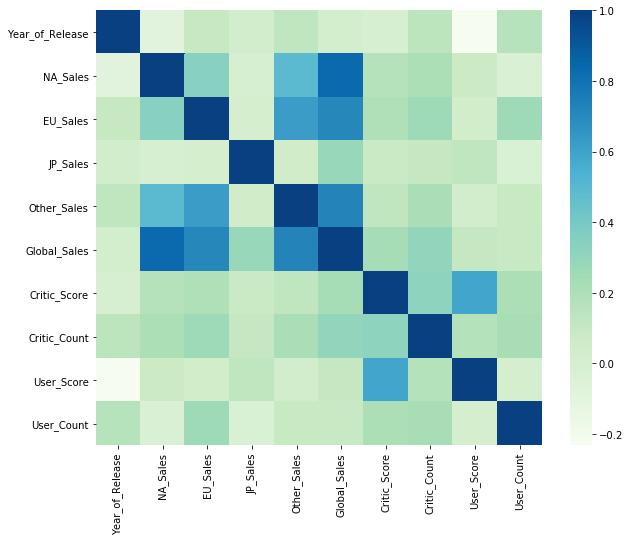

In [494]:
plt.figure(figsize=(10,8))
sns.heatmap(testdf.corr(), cmap='GnBu')

Sadly the Critic_Score or User_Score is not correlated with the sales of a videogame. But we can see the North American Sales and the European Sales as a major influence to the Global Sales, also we can relate the Critic_Score with the User_Score

## Plot relations to find the best linear relation

Text(0.5, 1.0, 'Original Dataset')

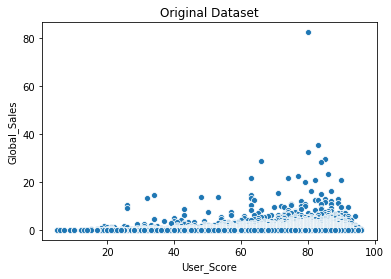

In [495]:
sns.scatterplot(x='User_Score', y='Global_Sales', data=df)
plt.title('Original Dataset')

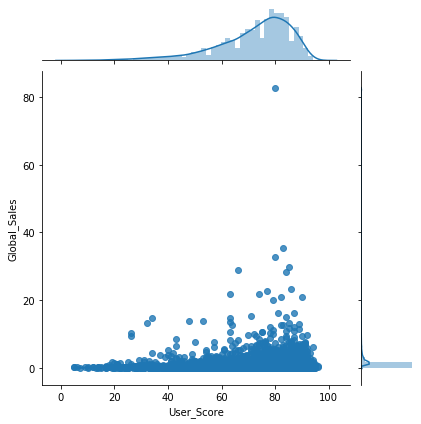

In [496]:
sns.jointplot(x=df['User_Score'], y=df['Global_Sales'], kind='reg');

### Altered dataset mean I am plotting only the games with under 1M copies sold worldwide

Text(0.5, 1.0, 'Altered Dataset')

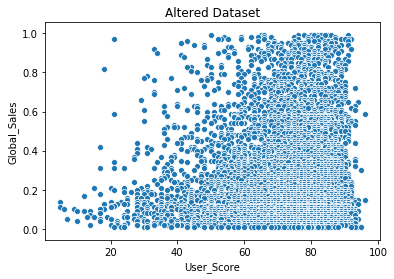

In [168]:
sns.scatterplot(x='User_Score', y='Global_Sales', data=testdf)
plt.title('Altered Dataset - User_Score vs Global Sales')

Text(0.5, 1.0, 'Altered Dataset')

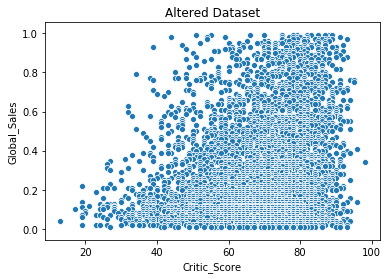

In [169]:
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=testdf)
plt.title('Altered Dataset - Critic Score vs Global Sales')

Even after select only games that has sold under 1 million copies there is no linear relationship between the sales and the critics or user scores

### Let's try relating the sales from single continents with the Global Sales

Text(0.5, 1.0, 'North America Sales vs Global Sales')

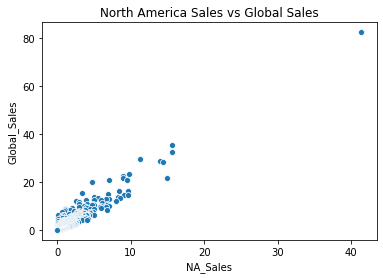

In [170]:
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=df)
plt.title('North America Sales vs Global Sales')

Text(0.5, 1.0, 'European Sales vs Global Sales')

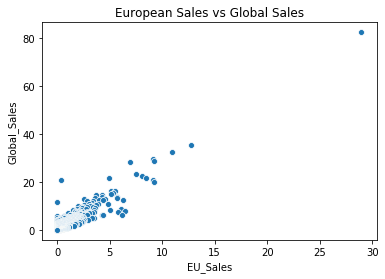

In [172]:
sns.scatterplot(x='EU_Sales', y='Global_Sales', data=df)
plt.title('European Sales vs Global Sales')

Text(0.5, 1.0, 'Japan Sales vs Global Sales')

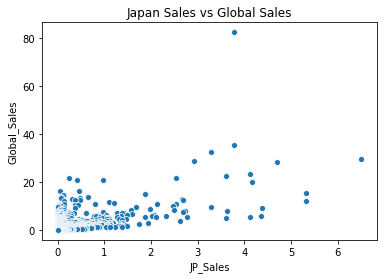

In [174]:
sns.scatterplot(x='JP_Sales', y='Global_Sales', data=df)
plt.title('Japan Sales vs Global Sales')

Text(0.5, 1.0, 'Other Sales vs Global Sales')

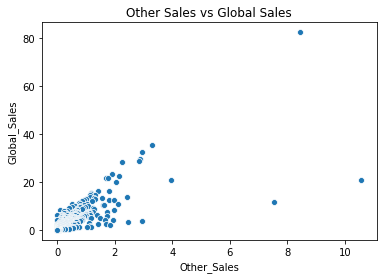

In [175]:
sns.scatterplot(x='Other_Sales', y='Global_Sales', data=df)
plt.title('Other Sales vs Global Sales')

North America sales is the continent with the best linear relationship with Global Sales

### Now let's try relating the Critic_Score with the User_Score

Text(0.5, 1.0, 'Critic Score vs User Score')

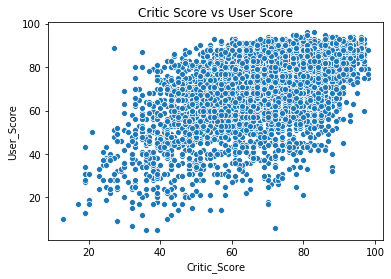

In [177]:
sns.scatterplot(x='Critic_Score', y='User_Score', data=df)
plt.title('Critic Score vs User Score')

Probably the best prediction is to try to guess the Global Sales based in the sales of a single continent

# Prediction

### Prepare our training and test sets

In [497]:
X_train, X_test, y_train, y_test = train_test_split(df['NA_Sales'], df['Global_Sales'], test_size=0.20, random_state=42)

In [498]:
X_train.shape

(5460,)

In [499]:
X_test.shape

(1365,)

In [500]:
X_train

2160     0.36
2976     0.63
3430     0.39
7997     0.09
10814    0.09
         ... 
6822     0.22
10306    0.10
10416    0.05
10884    0.08
1345     0.96
Name: NA_Sales, Length: 5460, dtype: float64

# Create a simple Linear Regression model

In [501]:
X = sm.add_constant(X_train)
simple_model = sm.OLS(y_train, X)

simple_result = simple_model.fit();

In [502]:
print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 6.388e+04
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:45:56   Log-Likelihood:                -4685.4
No. Observations:                5460   AIC:                             9375.
Df Residuals:                    5458   BIC:                             9388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.008     -0.064      0.9

### Test data

In [503]:
X_test

146      3.18
4427     0.17
6970     0.17
3885     0.36
11023    0.05
         ... 
2447     0.60
14897    0.02
7156     0.00
13120    0.03
2138     0.44
Name: NA_Sales, Length: 1365, dtype: float64

## Make a prediction 

In [504]:
y_pred_simple = simple_result.predict(sm.add_constant(X_test))

Text(0.5, 1.0, 'Regression plot')

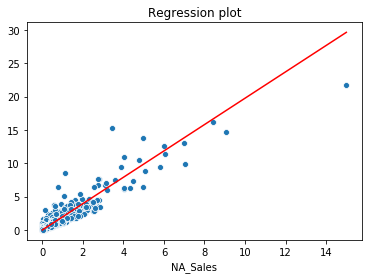

In [505]:
sns.scatterplot(x = X_test, y = y_test.values.ravel())
sns.lineplot(x = X_test , y = y_pred_simple, color='r')
plt.title("Regression plot")

In [506]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_simple))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.607861668379179


# Lasso Regression

In [507]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_b
X_t = np.c_[np.ones((len(X_test), 1)), X_test]

### Find the best posibble alpha

In [508]:
best_alpha = 0
best_score = 0
for alpha in np.arange(-1, 1, 0.1):
    #print(alpha)
    lasso_model = Lasso(alpha=alpha, fit_intercept=True)
    lasso_model.fit(X_b, y_train)
    score = lasso_model.score(X_t, y_test)
    if score > best_score:
        best_score = score
        best_alpha = alpha
print("Best Score:", best_score)
print("Best Alpha:", best_alpha)

Best Score: 0.8777617818370658
Best Alpha: 0.19999999999999973


e:\githubs\machine-learning-models-\venv_mlm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1399.0941625798766, tolerance: 2.259515153470695
  positive)
e:\githubs\machine-learning-models-\venv_mlm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2517.453762106631, tolerance: 2.259515153470695
  positive)


In [509]:
# Lasso regression model with alpha = 10 (some penalty)
lasso_model = Lasso(alpha=best_alpha, fit_intercept=True)
lasso_model.fit(X_b, y_train)
lasso_pred = lasso_model.predict(X_t)
print(lasso_model.score(X_t, y_test))
lasso_model.coef_

0.8777617818370658


array([0.        , 1.77141866])

In [510]:
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.5763697941906596


Text(0.5, 1.0, 'Lasso Regression')

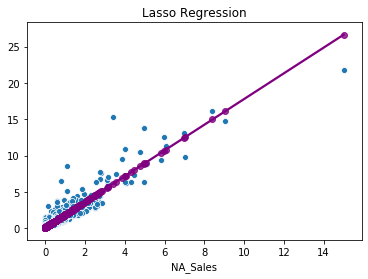

In [511]:
# Plot to compare models
sns.scatterplot(x = X_test, y = y_test.values.ravel())
sns.regplot(x = X_test, y = lasso_pred.ravel(), color='purple', label="Lasso");
plt.title("Lasso Regression")

### Compare Lasso with Simple Linear model 

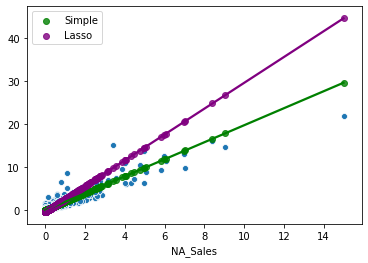

In [512]:
# Plot to compare models
sns.scatterplot(x = X_test, y = y_test.values.ravel())
sns.regplot(x = X_test, y = y_pred_simple, color='g', label="Simple")
sns.regplot(x = X_test, y = lasso_10_pred.ravel(), color='purple', label="Lasso");
plt.legend()

# Ridge Regression

Choose the best alpha for a Ridge Regression

In [513]:
best_ridge_alpha = 0
best_ridge_score = 0
for alpha in range(-10000, 10000, 1):
    ridge_model = Ridge(alpha=alpha, fit_intercept=True)
    ridge_model.fit(X_b, y_train)
    score = ridge_model.score(X_t, y_test)
    if score > best_ridge_score:
        best_ridge_score = score
        best_ridge_alpha = alpha
print("Best Score:", best_ridge_score)
print("Best Alpha:", best_ridge_alpha)

Best Score: 0.8778268517873344
Best Alpha: 668


In [514]:
# Ridge regression with high penalty
ridge_model = Ridge(alpha=best_ridge_alpha, fit_intercept=True)
ridge_model.fit(X_b, y_train)
ridge_pred = ridge_model.predict(X_t)
print(ridge_model.score(X_t, y_test))
ridge_model.coef_

0.8778268517873344


array([0.        , 1.75619474])

In [515]:
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.576216366944974


Text(0.5, 1.0, 'Ridge Regression')

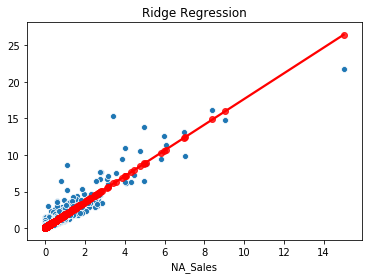

In [516]:
sns.scatterplot(x = X_test, y = y_test.values.ravel())
sns.regplot(x = X_test, y = ridge_pred.ravel(), color='red', label="Ridge")
plt.title("Ridge Regression")

## Compare Simple Linear Regression, Lasso and Ridge

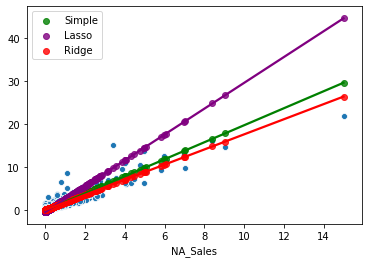

In [517]:
# Plot to compare all models
sns.scatterplot(x = X_test, y = y_test.values.ravel())
sns.regplot(x = X_test, y = y_pred_simple, color='g', label="Simple")
sns.regplot(x = X_test, y = lasso_10_pred.ravel(), color='purple', label="Lasso");
sns.regplot(x = X_test, y = ridge_pred.ravel(), color='red', label="Ridge");
plt.legend()

# Test a polynomial regression

### Reset our training set to confirm we are using the one with the outliers

In [518]:
X_train, X_test, y_train, y_test = train_test_split(df['NA_Sales'], df['Global_Sales'], test_size=0.20, random_state=42)

### Make a single column of 1's so it fits with the matrix shapes

In [519]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_b
X_t = np.c_[np.ones((len(X_test), 1)), X_test]

### Do a polynomial regression

In [520]:
poly_reg2 = PolynomialFeatures(degree = 4)
X_poly_train = poly_reg2.fit_transform(X_b)
X_poly_test = poly_reg2.fit_transform(X_t)

In [521]:
# Fit linear model now polynomial features
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

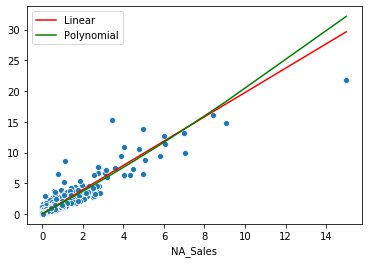

In [522]:
# Plot to compare models
sns.scatterplot(x = X_test, y = y_test.values.ravel())
sns.lineplot(x = X_test, y = y_pred_simple,color='r', label="Linear")
sns.lineplot(x = X_test, y = y_poly_pred.ravel(),color='g', label="Polynomial");

In [523]:
# Retrain to be able to print summary table
poly_model = sm.OLS(y_train, X_poly_train)
poly_result = poly_model.fit()

In [524]:
# Print model evaluation metrics
print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:48:40   Log-Likelihood:                -4593.8
No. Observations:                5460   AIC:                             9198.
Df Residuals:                    5455   BIC:                             9231.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0111      0.002      5.508      0.0

In [525]:
rmse = np.sqrt(mean_squared_error(y_test, y_poly_pred))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.6327983045021764


# Remove Outliers from the dataset to sales under 50 million

In [526]:
no_outliers = df[df['Global_Sales'] < 50]
no_outliers

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,84.0,594.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,24.0,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,88.0,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,76.0,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,58.0,43.0,Atomic Games,T


In [527]:
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(no_outliers['NA_Sales'], no_outliers['Global_Sales'], test_size=0.20, random_state=42)

In [528]:
X = sm.add_constant(X_train_no)
simple_model = sm.OLS(y_train_no, X)

simple_result = simple_model.fit();

In [530]:
print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 4.544e+04
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:50:00   Log-Likelihood:                -4585.2
No. Observations:                5459   AIC:                             9174.
Df Residuals:                    5457   BIC:                             9188.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106      0.008      1.267      0.2

### Make a prediction

In [531]:
y_pred_simple = simple_result.predict(sm.add_constant(X_test_no))

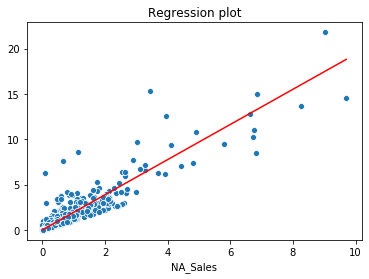

In [532]:
sns.scatterplot(x = X_test_no, y = y_test_no.values.ravel())
sns.lineplot(x = X_test_no , y = y_pred_simple, color='r')
plt.title('Regression plot');

In [533]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_simple))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.6475726247938575


### Removing the outlier from the dataset did not made a better model. In fact r squared score was reduced by 0.03

# From this point I will repeat the same process of finding the Best Lasso and Ridge Prediction for the dataset without outliers

# Lasso Predicition

In [534]:
X_b = np.c_[np.ones((len(X_train_no), 1)), X_train_no]
X_b
X_t = np.c_[np.ones((len(X_test_no), 1)), X_test_no]

### Find the best posible alpha

In [535]:
best_alpha = 0
best_score = 0
for alpha in np.arange(-5, 5, 0.1):
    #print(alpha)
    lasso_model = Lasso(alpha=alpha, fit_intercept=True)
    lasso_model.fit(X_b, y_train_no)
    score = lasso_model.score(X_t, y_test_no)
    if score > best_score:
        best_score = score
        best_alpha = alpha
print("Best Score:", best_score)
print("Best Alpha:", best_alpha)

Best Score: 0.8490487399069118
Best Alpha: 0.09999999999998188


e:\githubs\machine-learning-models-\venv_mlm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1312.1838370946111, tolerance: 1.5993330669389998
  positive)
e:\githubs\machine-learning-models-\venv_mlm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3483.1525727120343, tolerance: 1.5993330669389998
  positive)


In [536]:
# Lasso regression model with alpha = 10 (some penalty)
lasso_model = Lasso(alpha=best_alpha, fit_intercept=True)
lasso_model.fit(X_b, y_train_no)
lasso_pred = lasso_model.predict(X_t)
print(lasso_model.score(X_t, y_test_no))
lasso_model.coef_

0.8490487399069118


array([0.        , 1.79547242])

In [537]:
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.6463172700111284


### Compare Lasso with Simple Linear model 

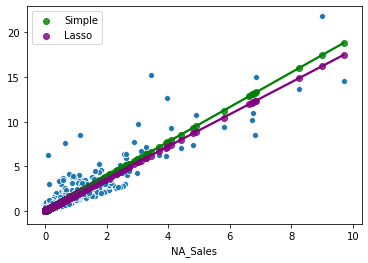

In [538]:
# Plot to compare models
sns.scatterplot(x = X_test_no, y = y_test_no.values.ravel())
sns.regplot(x = X_test_no, y = y_pred_simple, color='g', label="Simple")
sns.regplot(x = X_test_no, y = lasso_pred.ravel(), color='purple', label="Lasso");
plt.legend()

# Ridge Regression

Choose the best alpha for a Ridge Regression

In [539]:
best_ridge_alpha = 0
best_ridge_score = 0
for alpha in range(-10000, 10000, 1):
    ridge_model = Ridge(alpha=alpha, fit_intercept=True)
    ridge_model.fit(X_b, y_train_no)
    score = ridge_model.score(X_t, y_test_no)
    if score > best_ridge_score:
        best_ridge_score = score
        best_ridge_alpha = alpha
print("Best Score:", best_ridge_score)
print("Best Alpha:", best_ridge_alpha)

Best Score: 0.8495490049640717
Best Alpha: 205


In [540]:
# Ridge regression with high penalty
ridge_model = Ridge(alpha=best_ridge_alpha, fit_intercept=True)
ridge_model.fit(X_b, y_train_no)
ridge_pred = ridge_model.predict(X_t)
print(ridge_model.score(X_t, y_test_no))
ridge_model.coef_

0.8495490049640717


array([0.       , 1.8399095])

In [541]:
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.6444233771418328


## Compare Simple Linear Regression, Lasso and Ridge

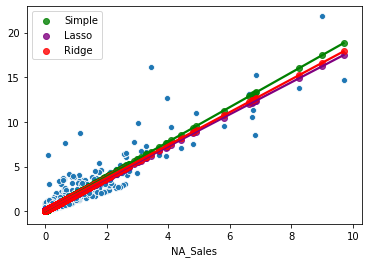

In [542]:
# Plot to compare all models
sns.scatterplot(x = X_test_no, y = y_test.values.ravel())
sns.regplot(x = X_test_no, y = y_pred_simple, color='g', label="Simple")
sns.regplot(x = X_test_no, y = lasso_pred.ravel(), color='purple', label="Lasso");
sns.regplot(x = X_test_no, y = ridge_pred.ravel(), color='red', label="Ridge");
plt.legend()

# Remove Outliers from the dataset to sales under 5 million

In [543]:
no_outliers = df[df['Global_Sales'] < 5]
no_outliers

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
208,Guitar Hero III: Legends of Rock,PS2,2007.0,Misc,Activision,3.49,0.01,0.01,1.48,4.98,82.0,24.0,82.0,46.0,"Neversoft Entertainment, BudCat",T
209,Link's Crossbow Training,Wii,2007.0,Shooter,Nintendo,3.05,1.17,0.29,0.46,4.98,68.0,34.0,71.0,47.0,Nintendo,T
211,Fallout 3,X360,2008.0,Role-Playing,Bethesda Softworks,3.40,0.99,0.09,0.45,4.93,93.0,84.0,85.0,1655.0,Bethesda Game Studios,M
212,Uncharted: Drake's Fortune,PS3,2007.0,Action,Sony Computer Entertainment,2.31,1.72,0.12,0.77,4.92,88.0,66.0,81.0,2306.0,"Naughty Dog, SCE/WWS",T
213,Madden NFL 06,PS2,2005.0,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91,88.0,29.0,80.0,121.0,EA Sports,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,24.0,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,88.0,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,76.0,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,58.0,43.0,Atomic Games,T


In [544]:
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(no_outliers['NA_Sales'], no_outliers['Global_Sales'], test_size=0.20, random_state=42)

# Create a simple linear model

In [545]:
X = sm.add_constant(X_train_no)
simple_model = sm.OLS(y_train_no, X)

simple_result = simple_model.fit();

In [546]:
print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 2.485e+04
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:53:22   Log-Likelihood:                -1555.3
No. Observations:                5345   AIC:                             3115.
Df Residuals:                    5343   BIC:                             3128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0905      0.005     16.796      0.0

### Make a prediction

In [547]:
y_pred_simple = simple_result.predict(sm.add_constant(X_test_no))

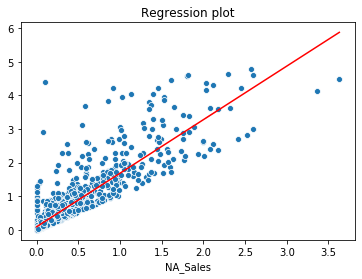

In [548]:
sns.scatterplot(x = X_test_no, y = y_test_no.values.ravel())
sns.lineplot(x = X_test_no , y = y_pred_simple, color='r')
plt.title('Regression plot');

In [549]:
rmse = np.sqrt(mean_squared_error(y_test_no, y_pred_simple))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.3904390538509194


### Leaving only games that sold under 5 million units decreased the r squared score but improved on the RMSE score

# From this point I will repeat the same process of finding the Best Lasso and Ridge Prediction for the dataset with global sales under 5M

# Lasso Predicition

In [550]:
X_b = np.c_[np.ones((len(X_train_no), 1)), X_train_no]
X_b
X_t = np.c_[np.ones((len(X_test_no), 1)), X_test_no]

### Find the best posible alpha

In [551]:
best_alpha = 0
best_score = 0
for alpha in np.arange(-5, 5, 0.1):
    #print(alpha)
    lasso_model = Lasso(alpha=alpha, fit_intercept=True)
    lasso_model.fit(X_b, y_train_no)
    score = lasso_model.score(X_t, y_test_no)
    if score > best_score:
        best_score = score
        best_alpha = alpha
print("Best Score:", best_score)
print("Best Alpha:", best_alpha)

Best Score: 0.7775910726605637
Best Alpha: -1.7763568394002505e-14


e:\githubs\machine-learning-models-\venv_mlm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118.9053459926658, tolerance: 0.3165162999700655
  positive)


In [552]:
# Lasso regression model with alpha = 10 (some penalty)
lasso_model = Lasso(alpha=best_alpha, fit_intercept=True)
lasso_model.fit(X_b, y_train_no)
lasso_pred = lasso_model.predict(X_t)
print(lasso_model.score(X_t, y_test_no))
lasso_model.coef_

0.7775910726605637


e:\githubs\machine-learning-models-\venv_mlm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118.9053459926658, tolerance: 0.3165162999700655
  positive)


array([0.        , 1.59509515])

In [553]:
rmse = np.sqrt(mean_squared_error(y_test_no, lasso_pred))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.39043905385091715


### Compare Lasso with Simple Linear model 

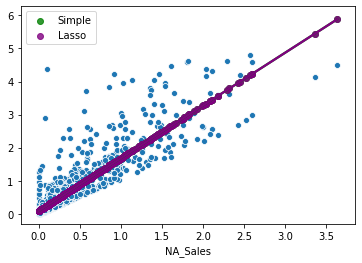

In [554]:
# Plot to compare models
sns.scatterplot(x = X_test_no, y = y_test_no.values.ravel())
sns.regplot(x = X_test_no, y = y_pred_simple, color='g', label="Simple")
sns.regplot(x = X_test_no, y = lasso_pred.ravel(), color='purple', label="Lasso");
plt.legend()

# Ridge Regression

Choose the best alpha for a Ridge Regression

In [555]:
best_ridge_alpha = 0
best_ridge_score = 0
for alpha in range(-10000, 10000, 1):
    ridge_model = Ridge(alpha=alpha, fit_intercept=True)
    ridge_model.fit(X_b, y_train_no)
    score = ridge_model.score(X_t, y_test_no)
    if score > best_ridge_score:
        best_ridge_score = score
        best_ridge_alpha = alpha
print("Best Score:", best_ridge_score)
print("Best Alpha:", best_ridge_alpha)

Best Score: 0.7782170768461704
Best Alpha: -29


In [556]:
# Ridge regression with high penalty
ridge_model = Ridge(alpha=best_ridge_alpha, fit_intercept=True)
ridge_model.fit(X_b, y_train_no)
ridge_pred = ridge_model.predict(X_t)
print(ridge_model.score(X_t, y_test_no))
ridge_model.coef_

0.7782170768461704


array([0.        , 1.64159029])

In [557]:
rmse = np.sqrt(mean_squared_error(y_test_no, ridge_pred))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.38988919123009325


## Compare Simple Linear Regression, Lasso and Ridge

Text(0.5, 1.0, 'Comparison with sales under 5M')

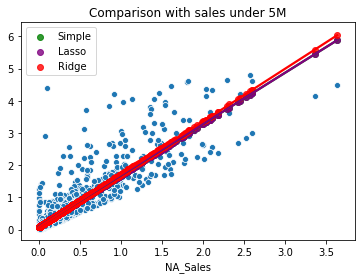

In [558]:
# Plot to compare all models
sns.scatterplot(x = X_test_no, y = y_test_no.values.ravel())
sns.regplot(x = X_test_no, y = y_pred_simple, color='g', label="Simple")
sns.regplot(x = X_test_no, y = lasso_pred.ravel(), color='purple', label="Lasso");
sns.regplot(x = X_test_no, y = ridge_pred.ravel(), color='red', label="Ridge");
plt.legend()
plt.title("Comparison with sales under 5M")

# Let's try with another independent variable

I will do this just to check how different is the relationship in a region with different preferences on videogames

In [559]:
X_train, X_test, y_train, y_test = train_test_split(df['JP_Sales'], df['Global_Sales'], test_size=0.20, random_state=42)

In [560]:
X = sm.add_constant(X_train)
simple_model = sm.OLS(y_train, X)

simple_result = simple_model.fit();

In [561]:
print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     3648.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:56:07   Log-Likelihood:                -10227.
No. Observations:                5460   AIC:                         2.046e+04
Df Residuals:                    5458   BIC:                         2.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4844      0.022     22.189      0.0

## Make a prediction 

In [562]:
y_pred_simple = simple_result.predict(sm.add_constant(X_test))

Text(0.5, 1.0, 'Regression plot')

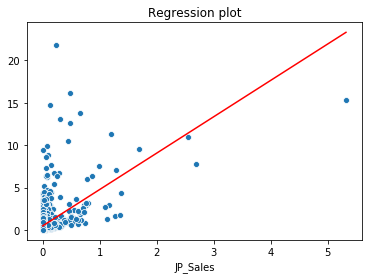

In [563]:
sns.scatterplot(x = X_test, y = y_test.values.ravel())
sns.lineplot(x = X_test , y = y_pred_simple, color='r')
plt.title("Regression plot")

In [564]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_simple))
print("Root Mean squared error: ", rmse)

Root Mean squared error:  1.4497019844177015


# Conclusions

*   Removing the outliers of the dataset improved the better as it returned a RMSE error of almost half than when using the full dataset. 
*	Polynomial regression made a worse model, probably because the data is completely linear. 
*	Lasso and Ridge regression where the best predicting models for this dataset. 
*	We can have a good guess of how much a videogame will sell globally based on how well it sells in North America. 
*	Lasso and Ridge regression will have the same R2 error and RMSE error when we select the best alpha for those algorithms. 
